# Um dia no papel de um analista de dados financeiros

## Pedido do Cliente

Um cliente questionou-nos se tem sido mais vantajoso investir no MSCI World ou no S&P 500, durante a última década (vamos imaginar inicialmente um período de 2011-12-30 a 2021-12-30).

Pediu um gráfico onde pudesse ver isso mas também a taxa de crescimento de cada investimento.

Pediu também que analisássemos o Lyxor Euro Government Bond 15+Y (DR) que é de obrigações governamentais europeis de muito longo prazo.

No fim pediu-nos uma opinião sobre a combinação de dois fundos que neste período analisado trouxeram maior diversificação e quais os dois ETFs que deveria usar na criação da sua carteira diversificada.

## O que vamos precisar de fazer

1) Faça um gráfico de linhas comparativo entre:

- CSPX.AS (S&P 500 UCITS ETF)
- IWDA.AS (MSCI World UCITS ETF)
- LYXF.F (Lyxor Euro Government Bond 15+Y)

desde 2011-12-30 até 2021-12-31

2) Faça um gráfico de dispersão para cada 3 dos pares. Qual é a conclusão a que chegamos?

3) Faça um map de calor das correlações. Confirmou as suas suspeitas?

4) Qual é o g (crescimento) de cada ETF nestes 10 anos? O que é que isto representa?

5) Com a fórmula compute_FV_lump_sum() confirme os dados do g.

6) Actualize a análise para o dia de hoje.

7) Vamos para além do que o cliente pediu e vamos fazer um gráfico de barras com os retornos anuais. É um informação útil e o cliente vai ficar satisfeito.

## O que é um ETF?

 - ETF é uma sigla que vem de Exchange Traded Fund, em português pode-se dizer que é um fundo “trocável” em bolsa, ou seja, pode-se comprar e vender em bolsa, ao contrário dos fundos de investimento tradicionais.

 - Os ETF podem ser constituídos por todos os tipos de investimentos, tais como: ações, obrigações, comodities e pares cambiais. Estes podem também dividir-se por setores.

 - A maioria dos ETF seguem uma filosofia de gestão passiva, seguindo um ìndice como o S&P500 por exemplo. Ao ser de gestão passiva permite ter uma Taxa de gestão muito baixa.
 
 - <b>Ler mais:</b> https://www.investopedia.com/terms/e/etf.asp

## CSPX

Este ETF segue o índice S&P500, o índice mais usado para fins de benchmarking. O Fundo busca acompanhar o desempenho de um índice composto por 500 empresas norte-americanas de grande capitalização de mercado.

<b>Encargos Totais Correntes</b> : 0.07% anual

<b>Distribuição</b> : Acumulativo

<b>Replicação</b> : Física (Compra e vende as ações)

<b>Tamanho do fundo</b> : 67.7B USD

<b>Data de lançamento do fundo</b> : 18 maio 2010

<b>Número de participações</b> : 503

<b>Top 10 Holdings</b>, a 6 dezembro 2023:

![](https://raw.githubusercontent.com/notp1ssed/Trabalho_AnaliseDados_RuiCaseiro/main/CSPX_TopHoldings.png)

<b>Alocação a Setores</b>, a 6 de dezembro 2023:

![](https://raw.githubusercontent.com/notp1ssed/Trabalho_AnaliseDados_RuiCaseiro/main/CSPX_Sectors.png)


## IWDA

O Fundo busca acompanhar o desempenho de um índice composto por empresas de países desenvolvidos. 

<b>Encargos Totais Correntes</b> : 0.2% anual

<b>Distribuição</b> : Acumulativo

<b>Replicação</b> : Física (Compra e vende as ações)

<b>Tamanho do fundo</b> : 62.2B USD

<b>Data de lançamento do fundo</b> : 25 setembro 2009

<b>Número de participações</b> : 1485

<b>Top 10 Holdings</b>, a 6 dezembro 2023:

![](https://raw.githubusercontent.com/notp1ssed/Trabalho_AnaliseDados_RuiCaseiro/main/IWDA_TopHoldings.png)

<b>Alocação a Setores</b>, a 6 de dezembro 2023:

![](https://raw.githubusercontent.com/notp1ssed/Trabalho_AnaliseDados_RuiCaseiro/main/IWDA_Sectors.png)

## LYXF

Este Fundo replica o índice da Bloomberg de obrigações governamentais europeias de muito longo prazo.

<b>Encargos Totais Correntes</b> : 0.17% anual

<b>Distribuição</b> : Acumulativo

<b>Replicação</b> : Física (Compra e vende as obrigações)

<b>Tamanho do fundo</b> : 88M €

<b>Data de lançamento do fundo</b> : 20 junho 2007

<b>Top 10 Exposição por país</b>, a 6 de dezembro 2023:

![](https://raw.githubusercontent.com/notp1ssed/Trabalho_AnaliseDados_RuiCaseiro/main/LYXF_Paises.png)


## 1) Faça um gráfico de linhas comparativo entre:

In [1]:
#Importacao das libraries
import numpy as np
import pandas as pd
import yfinance as yf
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import pingouin

In [2]:
#Definicoes problema
tickers = ['CSPX.AS', 'IWDA.AS', 'LYXF.F']
start = '2011-12-30'
end = '2021-12-31'

#Definicao funcoes
def merge_time_series(df_1, df_2, how='outer'):
    df = df_1.merge(df_2, how=how, left_index=True, right_index=True)
    return df

def normalize(df):
    df = df.dropna()
    return (df / df.iloc[0]) * 100

def download_yahoo_data(tickers, normalize_quotes=False,
                      start=start, end=end):
    quotes = pd.DataFrame()
    for ticker in tickers:
        df = yf.download(ticker, start=start, end=end, progress=False)
        df = df[['Adj Close']]
        df.columns=[ticker]
        quotes = merge_time_series(quotes, df)
    
    quotes = quotes.ffill()
     
    if normalize_quotes:
        quotes = normalize(quotes)

    return quotes

ETFs = download_yahoo_data(tickers, start=start, end=end)

# Resample para business month
# (seleccionando o último preço de cada dia útil do mês)
ETFs_mensal = ETFs.resample('BM').last()

In [3]:
ETFs_mensal

,CSPX.AS,IWDA.AS,LYXF.F
Date,,,
2011-12-30,84.595001,20.780001,125.348900
2012-01-31,87.040001,21.565001,127.177803
2012-02-29,89.144997,22.200001,131.210907
2012-03-30,92.165001,22.584999,130.917297
2012-04-30,92.144997,22.395000,130.770996
...,...,...,...
2021-08-31,390.382996,73.379997,274.119995
2021-09-30,382.233002,72.000000,266.369995
2021-10-29,405.216003,75.745003,268.350006


In [4]:
# Fazer com que as séries temporais comecem do mesmo ponto
ETFs_mensal = normalize(ETFs_mensal)

# Fazer gráfico vazio
fig = go.Figure()

# Mover legenda para baixo
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=-0.5,
    xanchor="center",
    x=0.5))

# Adicionar as linhas (uma a uma)
fig = fig.add_trace(go.Scatter(x=ETFs_mensal.index, y=ETFs_mensal[tickers[0]], name='S&P500'))
fig = fig.add_trace(go.Scatter(x=ETFs_mensal.index, y=ETFs_mensal[tickers[1]], name='MSCI WORLD'))
fig = fig.add_trace(go.Scatter(x=ETFs_mensal.index, y=ETFs_mensal[tickers[2]], name='15+Yr EURO GOVERNMENT BOND'))

# Acrescentar símbolos de dólar e títulos nos eixos
fig = fig.update_yaxes(title='Preço ($)', ticksuffix='$')

# Acrescentar tema
fig = fig.update_layout(template='seaborn',
                        title='Analise Comparativa ETFs',
                        height=420,
                        width=790)

fig.show()

<b>R:</b> Com a leitura deste gráfico é visível que no período analisado, o S&P500 deu retornos superiores ao MSCI World e às obrigações governamentais europeias de muito longo prazo. No caso do S&P 500 e MSCI World a tendência é claramente positiva, sem mostrar sinais de abrandamento. As obrigações têm lateralizado nos últimos 2 anos de análise, com um baixo desempenho.

## 2) Faça um gráfico de dispersão para cada 3 dos pares. Qual é a conclusão a que chegamos?

In [5]:
for ticker in tickers:
    print(ticker)

CSPX.AS
IWDA.AS
LYXF.F


In [6]:
ETFs_ret = ETFs_mensal.pct_change()

# Fazer scatter plot
fig = px.scatter(ETFs_ret, x=tickers[0], y=tickers[1])
fig2 = px.scatter(ETFs_ret, x=tickers[0], y=tickers[2])
fig3 = px.scatter(ETFs_ret, x=tickers[1], y=tickers[2])

# Acrescentar tema
fig = fig.update_layout(template='seaborn')

fig.show()
fig2.show()
fig3.show()

<b>R:</b> Através dos gráficos de dispersão podemos concluir que o CSPX e IWDA estão positivamente correlacionados, quer isto dizer que qunado um sobe, o outro sobe também, isto acontece pois têm uma grande sobreposição de ativos, tal como podemos testemunhar através do top 10 holdings de cada ETF.
As obrigações governamentais europeias de muito longo prazo não apresentam correlação com o CSPX ou IWDA, isto porque não têm ativos iguais. Nem mesmo a classe de ativos é a mesma, uma vez que o CSPX e IWDA contêm ações.


## 3) Faça um mapa de calor das correlações. Confirmou as suas suspeitas?

In [7]:
# Calcular e usar retornos para comparações de correlação
ETFs_mensal_ret = ETFs_mensal.pct_change()

# É sempre aconselhável tirar quaisquer na's
# Remove all rows wit NULL values from the DataFrame.
ETFs_mensal_ret = ETFs_mensal_ret.dropna()

ETFs_mensal_ret_corr = ETFs_mensal_ret.corr()

In [8]:
ETFs_mensal_ret_corr

,CSPX.AS,IWDA.AS,LYXF.F
CSPX.AS,1.000000,0.966787,0.083306
IWDA.AS,0.966787,1.000000,0.087814
LYXF.F,0.083306,0.087814,1.000000


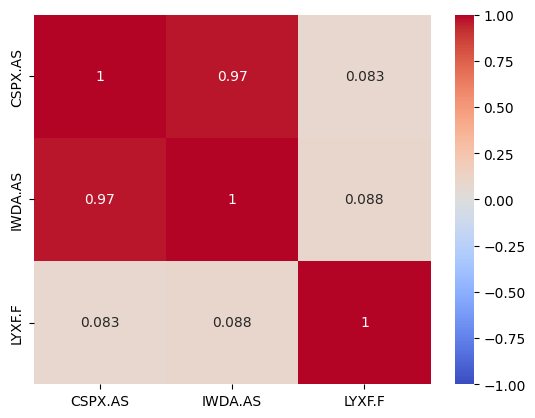

In [9]:
# Matriz de correlacoes

sns.heatmap(ETFs_mensal_ret_corr,
           annot=True,
           vmin=-1, vmax=1,
           cmap='coolwarm')

plt.show()

<b>R:</b> Com o mapa de calor, venho uma vez mais, confirmar as minhas suspeitas da alínea anterior. O IWDA e CSPX têm uma correlação positiva muito forte. As obrigações governamentais europeias de muito longo prazo não apresentam correlação com nenhum dos ETF. Como o CSPX e IWDA têm uma correlação tão forte não faz sentido ter ambos num portfolio, basta optar por um deles. De forma a diversificar o portfolio é vantajoso usar ativos com correlações negativas ou sem correlação entre si, uma vez que desta forma se reduz o risco do portfolio, pois os ativos são independentes entre si, então as perdas de um ativo podem ser compensadas com os ganhos de outro ativo.

## 4) Qual é o g (crescimento) de cada ETF nestes 10 anos? O que é que isto representa?

In [10]:
#Calcular CAGR r 
def compute_g(FV, PV, N):
    '''
    g = compounded growth
    FV = Future Value
    PV = Present Value
    n = years
    '''
    g = ((FV/PV)**(1/N))-1
    return g

In [11]:
ETFs_mensal

,CSPX.AS,IWDA.AS,LYXF.F
Date,,,
2011-12-30,100.000000,100.000000,100.000000
2012-01-31,102.890241,103.777670,101.459050
2012-02-29,105.378563,106.833494,104.676553
2012-03-30,108.948519,108.686229,104.442319
2012-04-30,108.924872,107.771895,104.325603
...,...,...,...
2021-08-31,461.472888,353.127983,218.685601
2021-09-30,451.838757,346.486995,212.502858
2021-10-29,479.007031,364.509145,214.082458


In [12]:
PV = 100
n = 10

#Growth CSPX.AS
gCSPX = compute_g(ETFs_mensal[tickers[0]].iloc[-1],PV,n)

#Growth IWDA.AS
gIWDA = compute_g(ETFs_mensal[tickers[1]].iloc[-1],PV,n)

#Growth LYXF.F
gLYXF = compute_g(ETFs_mensal[tickers[2]].iloc[-1],PV,n)


print(f"O retorno anualizado do {tickers[0]} é de {gCSPX}, quer isto dizer que cresceu {gCSPX:.2%} anualmente no período analisado.")
print(f"O retorno anualizado do {tickers[1]} é de {gIWDA}, quer isto dizer que cresceu {gIWDA:.2%} anualmente no período analisado.")
print(f"O retorno anualizado do {tickers[2]} é de {gLYXF}, quer isto dizer que cresceu {gLYXF:.2%} anualmente no período analisado.")

O retorno anualizado do CSPX.AS é de 0.17736225197087618, quer isto dizer que cresceu 17.74% anualmente no período analisado.
O retorno anualizado do IWDA.AS é de 0.14335718784119966, quer isto dizer que cresceu 14.34% anualmente no período analisado.
O retorno anualizado do LYXF.F é de 0.07857122937945471, quer isto dizer que cresceu 7.86% anualmente no período analisado.


## 5) Com a fórmula compute_FV_lump_sum() confirme os dados do g.

In [13]:
#Valor futuro de um cash flow único com capitalização superior a 1
def compute_FV_lump_sum(PV, r, N, m):
    '''
    PV = Present value / Valor actual
    r = Stated rate / Taxa de juro cotada
    N = número de anos
    m = número de capitalizações anuais
    '''
    FV = PV * (1+r/m)**(N*m)
    return FV

In [14]:
PV = 100
n = 10

#FV CSPX
FVCSPX = compute_FV_lump_sum(PV,gCSPX,n,1)

#FV IWDA
FVIWDA = compute_FV_lump_sum(PV,gIWDA,n,1)

#FV LYXF
FVLYXF = compute_FV_lump_sum(PV,gLYXF,n,1)


print(f"O Future Value do {tickers[0]} é de {FVCSPX}, que é igual ao último valor disponível no dataframe {ETFs_mensal[tickers[0]].iloc[-1]}.")
print(f"O Future Value do {tickers[1]} é de {FVIWDA}, que é igual ao último valor disponível no dataframe {ETFs_mensal[tickers[1]].iloc[-1]}.")
print(f"O Future Value do {tickers[2]} é de {FVLYXF}, que é igual ao último valor disponível no dataframe {ETFs_mensal[tickers[2]].iloc[-1]}.")

O Future Value do CSPX.AS é de 511.80093571124735, que é igual ao último valor disponível no dataframe 511.8009357112477.
O Future Value do IWDA.AS é de 381.7853535272413, que é igual ao último valor disponível no dataframe 381.785353527241.
O Future Value do LYXF.F é de 213.05332387973962, que é igual ao último valor disponível no dataframe 213.0533238797397.


<b>R:</b> Os Future value agora obtidos, vêm confimar a média geométrica calculada no passo anterior. Uma vez que, dá um resultado igual ao último valor da série temporal de cada um dos ETF.

## 6) Actualize a análise para o dia de hoje.

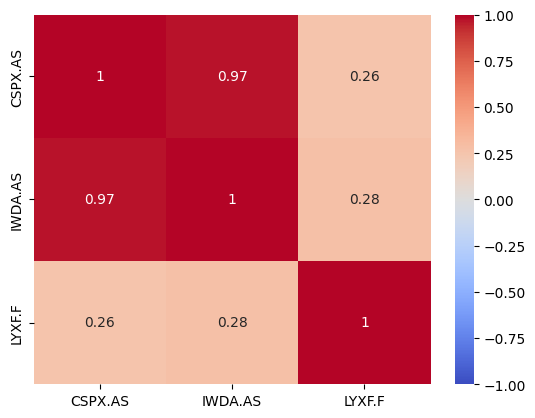

               CSPX.AS     IWDA.AS      LYXF.F
Date                                          
2011-12-30  100.000000  100.000000  100.000000
2012-01-31  102.890241  103.777670  101.459050
2012-02-29  105.378563  106.833494  104.676553
2012-03-30  108.948519  108.686229  104.442319
2012-04-30  108.924872  107.771895  104.325603
...                ...         ...         ...
2023-08-31  515.106084  377.935520  138.389728
2023-09-29  503.764995  371.944169  129.231294
2023-10-31  488.374028  359.359964  129.123587
2023-11-30  516.362645  380.028867  139.287223
2023-12-29  528.655354  389.196330  143.535363

[145 rows x 3 columns]
À data de 2023-12-29 o retorno anualizado do CSPX.AS é de 0.1488527979202907, quer isto dizer que cresceu 14.89% anualmente no período analisado.
À data de 2023-12-29 o retorno anualizado do IWDA.AS é de 0.11990382510228148, quer isto dizer que cresceu 11.99% anualmente no período analisado.
À data de 2023-12-29 o retorno anualizado do LYXF.F é de 0.0305757267924

In [15]:
#Definicoes problema
tickers = ['CSPX.AS', 'IWDA.AS', 'LYXF.F']
start = '2011-12-30'
end2 = '2030-12-31'

#Definicao de funcoes
def merge_time_series(df_1, df_2, how='outer'):
    df = df_1.merge(df_2, how=how, left_index=True, right_index=True)
    return df

def normalize(df):
    df = df.dropna()
    return (df / df.iloc[0]) * 100

def download_yahoo_data(tickers, normalize_quotes=False,
                      start=start, end=end2):
    quotes=pd.DataFrame()
    for ticker in tickers:
        df = yf.download(ticker, start=start, end=end2, progress=False)
        df = df[['Adj Close']]
        df.columns=[ticker]
        quotes = merge_time_series(quotes, df)
    
    quotes = quotes.ffill()
     
    if normalize_quotes:
        quotes = normalize(quotes)

    return quotes

# Calcular CAGR r 
def compute_g(FV, PV, N):
    '''
    g = compounded growth
    FV = Future Value
    PV = Present Value
    n = years
    '''
    g = ((FV/PV)**(1/N))-1
    return g


# Valor futuro de um cash flow único com capitalização superior a 1
def compute_FV_lump_sum(PV, r, N, m):
    '''
    PV = Present value / Valor actual
    r = Stated rate / Taxa de juro cotada
    N = número de anos
    m = número de capitalizações anuais
    '''
    FV = PV * (1+r/m)**(N*m)
    return FV

ETFs2 = download_yahoo_data(tickers, start=start, end=end2)

# Resample para business month
# (seleccionando o último preço de cada dia útil do mês)
ETFs2_mensal = ETFs2.resample('BM').last()

# Fazer com que as séries temporais comecem do mesmo ponto
ETFs2_mensal = normalize(ETFs2_mensal)


# GRAFICO DE LINHAS
# Fazer gráfico vazio
fig = go.Figure()
# Mover legenda para baixo
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=-0.5,
    xanchor="center",
    x=0.5))
# Adicionar as linhas (uma a uma)
fig = fig.add_trace(go.Scatter(x=ETFs2_mensal.index, y=ETFs2_mensal[tickers[0]], name='S&P500'))
fig = fig.add_trace(go.Scatter(x=ETFs2_mensal.index, y=ETFs2_mensal[tickers[1]], name='MSCI WORLD'))
fig = fig.add_trace(go.Scatter(x=ETFs2_mensal.index, y=ETFs2_mensal[tickers[2]], name='15+Yr EURO GOVERNMENT BOND'))
# Acrescentar símbolos de dólar e títulos nos eixos
fig = fig.update_yaxes(title='Preço ($)', ticksuffix='$')
# Acrescentar tema
fig = fig.update_layout(template='seaborn',
                        title='Analise Cliente Trabalho Hoje',
                        height=420,
                        width=790)
fig.show()


# GRAFICOS DE DISPERSAO
ETFs2_ret = ETFs2_mensal.pct_change()
# Fazer scatter plot
fig = px.scatter(ETFs2_ret, x=tickers[0], y=tickers[1])
fig2 = px.scatter(ETFs2_ret, x=tickers[0], y=tickers[2])
fig3 = px.scatter(ETFs2_ret, x=tickers[1], y=tickers[2])
# Acrescentar tema
fig = fig.update_layout(template='seaborn')
fig.show()
fig2.show()
fig3.show()


# CORRELACOES
# Calcular e usar retornos para comparações de correlação
ETFs2_mensal_ret = ETFs2_mensal.pct_change()
# É sempre aconselhável tirar quaisquer na's (Remove all rows wit NULL values from the DataFrame).
ETFs2_mensal_ret = ETFs2_mensal_ret.dropna()
ETFs2_mensal_ret_corr = ETFs2_mensal_ret.corr()

sns.heatmap(ETFs2_mensal_ret_corr,
           annot=True,
           vmin=-1, vmax=1,
           cmap='coolwarm')
plt.show()

# Ultimo dia do Data Frame
last_day2 = ETFs2_mensal_ret.iloc[-1].name.strftime('%Y-%m-%d')

PV = 100
n = 12 #2011 A 2023

# Growth CSPX.AS
g2CSPX = compute_g(ETFs2_mensal[tickers[0]].iloc[-1],PV,n)
# Growth IWDA.AS
g2IWDA = compute_g(ETFs2_mensal[tickers[1]].iloc[-1],PV,n)
# Growth LYXF.F
g2LYXF = compute_g(ETFs2_mensal[tickers[2]].iloc[-1],PV,n)


# FV CSPX
FV2CSPX = compute_FV_lump_sum(PV,g2CSPX,n,1)
# FV IWDA
FV2IWDA = compute_FV_lump_sum(PV,g2IWDA,n,1)
# FV LYXF
FV2LYXF = compute_FV_lump_sum(PV,g2LYXF,n,1)

print(ETFs2_mensal)

# Outputs Media Geometrica
print(f"À data de {last_day2} o retorno anualizado do {tickers[0]} é de {g2CSPX}, quer isto dizer que cresceu {g2CSPX:.2%} anualmente no período analisado.")
print(f"À data de {last_day2} o retorno anualizado do {tickers[1]} é de {g2IWDA}, quer isto dizer que cresceu {g2IWDA:.2%} anualmente no período analisado.")
print(f"À data de {last_day2} o retorno anualizado do {tickers[2]} é de {g2LYXF}, quer isto dizer que cresceu {g2LYXF:.2%} anualmente no período analisado.")

# Outputs Future Value
print(f"O Future Value do {tickers[0]} é de {FV2CSPX}, que é igual ao último valor disponível no dataframe {ETFs2_mensal[tickers[0]].iloc[-1]}, na data de {last_day2}.")
print(f"O Future Value do {tickers[1]} é de {FV2IWDA}, que é igual ao último valor disponível no dataframe {ETFs2_mensal[tickers[1]].iloc[-1]}, na data de {last_day2}.")
print(f"O Future Value do {tickers[2]} é de {FV2LYXF}, que é igual ao último valor disponível no dataframe {ETFs2_mensal[tickers[2]].iloc[-1]}, na data de {last_day2}.")

<b>R:</b>  Todos os passos foram atualizados para a data de hoje.

- No gráfico comparativo de desempenho, vemos que embora tenho havido uma grande correção no início de 2022, o CSPX e IWDA já recuperaram e ultrapassaram o máximo de finais de 2021. As obrigações governamentais europeias, por sua vez, têm estado em queda livre desde então.

- Os gráficos de dispersão contam-nos a mesma história, CSPX e IWDA com correlação positiva e forte. LYXF sem correlação com nenhum dos ETF.

- A matriz de correlações, uma vez mais, confirma as suspeitas adquiridas na análise aos gráficos de dispersão.

- <b>Médias de crescimento no output da célula.</b> o CSPX ainda é o ETF com melhor desempenho entre os 3 analisados, as obrigações são também o ETF com o pior desempenho.

- <b>Future value no output da célula.</b> Os Future Value, uma vez mais, confirmaram os resultados da média geométrica, encontrada no passo anterior.

## 7) Vamos para além do que o cliente pediu e vamos fazer um gráfico de barras com os retornos anuais. É um informação útil e o cliente vai ficar satisfeito.

In [16]:
for ticker in tickers:
    #Resample para anual --> (seleccionar o último preço de cada ano)
    ETFs2_anual = ETFs2.resample('BY').last()[[ticker]]

    #Transformar em Diferenca de Percentagem
    yoy_percentage_change = ETFs2_anual.pct_change() * 100

    # Ir buscar uma coluna qualquer e renomeá-la
    yoy_percentage_change.columns = ['Retorno %']

    # Apagar o primeiro ano para o qual nunca temos retorno
    yoy_percentage_change_ret = yoy_percentage_change.dropna()

    #Fazer Grafico de barras vertical
    bar_plot = px.bar(yoy_percentage_change_ret, 
                      x = yoy_percentage_change_ret.index, 
                      y = 'Retorno %', color=yoy_percentage_change_ret.index, 
                      template = 'seaborn', 
                      title =f'Retornos anuais: {ticker}', 
    height = 420, width = 798)

    # Hide the legend
    bar_plot.update_layout(showlegend=False)
    
    bar_plot.show()

<b>R:</b> O período analisado foi marcado por uma grande tendência de retornos positivos para os 3 ETFs analisados. O ano 2022 foi um ano negativo para os ETF CSPX e IWDA, a culpa é atribuída à subida das taxas de juro por parte da FED, consequência da subida da inflação. Quando há uma subida de taxas de juros, os empréstimos bancários ficam mais caros, ora isto acaba por enfraquecer a economia por 2 vias, diminuição de consumo de bens e serviços por parte da população e menos disponibilidade de obtenção de capital alheio por parte das empresas para investirem, estes 2 fatores levam naturalmente a uma descida do valor das empresas.

In [29]:
#CONSTRUCAO PORTFOLIO 
#Resample para anual --> (seleccionar o último preço de cada ano)
ETFs2_anual = ETFs2.resample('BY').last()

#Transformar em Diferenca de Percentagem
yoy_percentage_change = ETFs2_anual.pct_change()

# Apagar o primeiro ano para o qual nunca temos retorno
yoy_percentage_change_ret = yoy_percentage_change.dropna()

# Calcular média aritmética de cada ano
# Seria o retorno de uma carteira com um terço em cada ETF.
# O \ é a forma de python saber que há uma quebra de linha
yoy_percentage_change_ret['Portfolio (1/3)'] = (yoy_percentage_change_ret[f'{tickers[0]}'] + \
                                                yoy_percentage_change_ret[f'{tickers[1]}'] + \
                                                yoy_percentage_change_ret[f'{tickers[2]}']) / 3

#portfolio 50/50 CSPX e LYXF
yoy_percentage_change_ret[f'Portfolio (50/50) {tickers[0]} e {tickers[2]}'] = (yoy_percentage_change_ret[f'{tickers[0]}'] + \
                                                                                yoy_percentage_change_ret[f'{tickers[2]}']) / 2

#portfolio 50/50 IWDA e LYXF
yoy_percentage_change_ret[f'Portfolio (50/50) {tickers[1]} e {tickers[2]}'] = (yoy_percentage_change_ret[f'{tickers[1]}'] + \
                                                                                yoy_percentage_change_ret[f'{tickers[2]}']) / 2

#portfolio 80/20 CSPX e LYXF
yoy_percentage_change_ret[f'Portfolio (80/20) {tickers[0]} e {tickers[2]}'] = (yoy_percentage_change_ret[f'{tickers[0]}'] * 0.8) + \
                                                                                (yoy_percentage_change_ret[f'{tickers[2]}'] * 0.2)


yoy_percentage_change_ret

C:\Users\Rui Caseiro\AppData\Local\Temp\ipykernel_21112\4133132996.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rui Caseiro\AppData\Local\Temp\ipykernel_21112\4133132996.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rui Caseiro\AppData\Local\Temp\ipykernel_21112\4133132996.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,CSPX.AS,IWDA.AS,LYXF.F,Portfolio (1/3),Portfolio (50/50) CSPX.AS e LYXF.F,Portfolio (50/50) IWDA.AS e LYXF.F,Portfolio (80/20) CSPX.AS e LYXF.F
Date,,,,,,,
2012-12-31,0.105089,0.118383,0.170404,0.131292,0.137747,0.144394,0.118152
2013-12-31,0.286303,0.228055,0.007220,0.173859,0.146761,0.117637,0.230486
2014-12-31,0.306486,0.204100,0.323895,0.278160,0.315191,0.263997,0.309968
2015-12-31,0.123707,0.107377,0.019848,0.083644,0.071777,0.063612,0.102935
2016-12-30,0.136949,0.104454,0.082971,0.108125,0.109960,0.093712,0.126153
2017-12-29,0.071299,0.074947,-0.010876,0.045123,0.030212,0.032035,0.054864
2018-12-31,-0.003604,-0.041611,0.027438,-0.005926,0.011917,-0.007087,0.002604
2019-12-31,0.329895,0.295843,0.170735,0.265491,0.250315,0.233289,0.298063
2020-12-31,0.077169,0.062021,0.125530,0.088240,0.101349,0.093775,0.086841


# Ver médias Geométricas
# Desvio Padrao de cada um
# Fazer as probabilidades com a distribuição normal

## Qual a probabilidade do CSPX ter uma rentabilidade positiva em determinado dia?

In [18]:
data = yf.download(tickers[0], start=start, end=end2, progress=False)

#Criar coluna Change
data['Change (%)'] = data['Close'].pct_change() # Calcular os retornos

data = data.dropna() # Apagar os dias para os quais não há retorno
                     # O primeiro dia, pois não há nenhum dia anterior
                     # com o qual calcular o retorno

data_p = data[data['Change (%)'] > 0] # Calcular dias positivos

#Numero de dias total
len_data = len(data)

#Numero de dias positivos
len_data_p = len(data_p)

#Positivos/Total
prob_p = round(len(data_p) / len(data), 2)

prob_p


last_day = data.iloc[-1].name.strftime('%Y-%m-%d')
first_day = data.iloc[0].name.strftime('%Y-%m-%d')
formatted_prob_p = f"{prob_p:.0%}"

print(f"À data de {last_day} o número de dias na dataframe com a cotação do S&P 500 é de {len_data} dias e o número de dias positivos é de {len_data_p}.")

print(f"Logo a probabilidade empírica do S&P ter um retorno positivo em qualquer dia é por isso {len_data_p}/{len_data}, ou seja, {prob_p} ou {formatted_prob_p}.")

À data de 2023-12-08 o número de dias na dataframe com a cotação do S&P 500 é de 3057 dias e o número de dias positivos é de 1677.
Logo a probabilidade empírica do S&P ter um retorno positivo em qualquer dia é por isso 1677/3057, ou seja, 0.55 ou 55%.


In [19]:
# Probabilidade de alcançar X retorno
def compute_normal_cdf(mu, std, value):
    '''
    mu = media geometrica
    std = desvio padrao
    value = target return value
    '''
    return scipy.stats.norm(mu, std).cdf(value)

#Resample para mês
data_mensal = data.resample('BM').last()

#Definir o retorno alvo
target_value = 0.15

#Encontrar o desvio padrao
std = data_mensal['Change (%)'].std(ddof=1)

#Encontrar a media, é o g
mu = g2CSPX

probxreturn = 1 - compute_normal_cdf(mu, std, target_value)

print(f"O desvio padrao do {tickers[0]} é de {std}")
print(f"A media geometrica do {tickers[0]} é de {mu}")
print(f"O retorno alvo do portfolio é {target_value:.1%}")
print(f"A probabilidade do portfolio consituído apenas por {tickers[0]} atingir e ultrapassar o retorno alvo de {target_value} é de, {probxreturn:.2%}")

O desvio padrao do CSPX.AS é de 0.009284550053877271
A media geometrica do CSPX.AS é de 0.1488527979202907
O retorno alvo do portfolio é 15.0%
A probabilidade do portfolio consituído apenas por CSPX.AS atingir e ultrapassar o retorno alvo de 0.15 é de, 45.08%


## Testes - Aprendizagens

In [20]:
#Usar o primeiro valor da lista

tickers[0]

'CSPX.AS'

In [21]:
#Usar o ultimo valor da lista

tickers[-1]

'LYXF.F'

In [22]:
# Using f-string to include variables in a string

nome = "Rui"
age = 25

message = f"My name is {nome} and I am {age} years old."

print(message)

My name is Rui and I am 25 years old.


In [23]:
nr = [1, 5, 10, 55, 24, 99]

print(nr)

[1, 5, 10, 55, 24, 99]


In [24]:
for n in nr:
    print(n)

1
5
10
55
24
99


In [25]:
for ticker in tickers:
    print(ticker)

CSPX.AS
IWDA.AS
LYXF.F


In [26]:
for ticker in tickers:
    print(f"Retornos anuais, {ticker}")

Retornos anuais, CSPX.AS
Retornos anuais, IWDA.AS
Retornos anuais, LYXF.F
